In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [47]:
#function to generate data
def generate_data(n_samples):
    centers = [(0,0),(3,0),(6,0)] # initial 3 classes
    X, y = [],[]
    for i, center in enumerate(centers):
        data = np.random.randn(n_samples, 2) + center
        X.append(data)
        y += [i] * n_samples
    return np.vstack(X), np.array(y)

X,y = generate_data(40)


In [48]:
# creating/training the models
lr_model = OneVsRestClassifier(LogisticRegression()).fit(X, y)
lda_model = LinearDiscriminantAnalysis().fit(X, y)


In [49]:
# Add an extra class
new_class = np.random.randn(40, 2) + (9, 0)
X = np.vstack((X, new_class))
y = np.hstack((y, [3] * 40))  # Label as same as the 3rd class

# Retraining the model with the added class
lr_model_4class = OneVsRestClassifier(LogisticRegression()).fit(X, y)
lda_model_4class = LinearDiscriminantAnalysis().fit(X, y)


In [50]:
# Create a Voting Classifier that uses both models
ensemble_model = VotingClassifier(estimators=[('lr', lr_model_4class), ('lda', lda_model_4class)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X, y)

VotingClassifier(estimators=[('lr',
                              OneVsRestClassifier(estimator=LogisticRegression())),
                             ('lda', LinearDiscriminantAnalysis())],
                 voting='soft')

In [51]:
# Predicting using the individual models
y_pred_lr = lr_model_4class.predict(X)
y_pred_lda = lda_model_4class.predict(X)
y_pred_ensemble = ensemble_model.predict(X)

# Calculate accuracy
accuracy_lr = accuracy_score(y, y_pred_lr)
accuracy_lda = accuracy_score(y, y_pred_lda)
accuracy_ensemble = accuracy_score(y, y_pred_ensemble)

In [52]:
# Printing the accuracies in a refined, professional manner
print("\nModel Performance Comparison:")
print(f"{'Model':<30} {'Accuracy':<10}")
print("-" * 40)
print(f"{'Logistic Regression (One-vs-Rest)':<30} {accuracy_lr*100:.2f}%")
print(f"{'Linear Discriminant Analysis (LDA)':<30} {accuracy_lda*100:.2f}%")
print(f"{'Ensemble (Logistic Regression + LDA)':<30} {accuracy_ensemble*100:.2f}%")


Model Performance Comparison:
Model                          Accuracy  
----------------------------------------
Logistic Regression (One-vs-Rest) 89.38%
Linear Discriminant Analysis (LDA) 94.38%
Ensemble (Logistic Regression + LDA) 93.75%


In [53]:
# Identify the best model
best_model = max(
    [("Logistic Regression (One-vs-Rest)", accuracy_lr),
     ("Linear Discriminant Analysis (LDA)", accuracy_lda),
     ("Ensemble (Logistic Regression + LDA)", accuracy_ensemble)],
    key=lambda x: x[1]
)
# Print which model is the best
print("\nBest Model:")
print(f"The best model is: {best_model[0]} with an accuracy of {best_model[1]*100:.2f}%.\n")



Best Model:
The best model is: Linear Discriminant Analysis (LDA) with an accuracy of 94.38%.



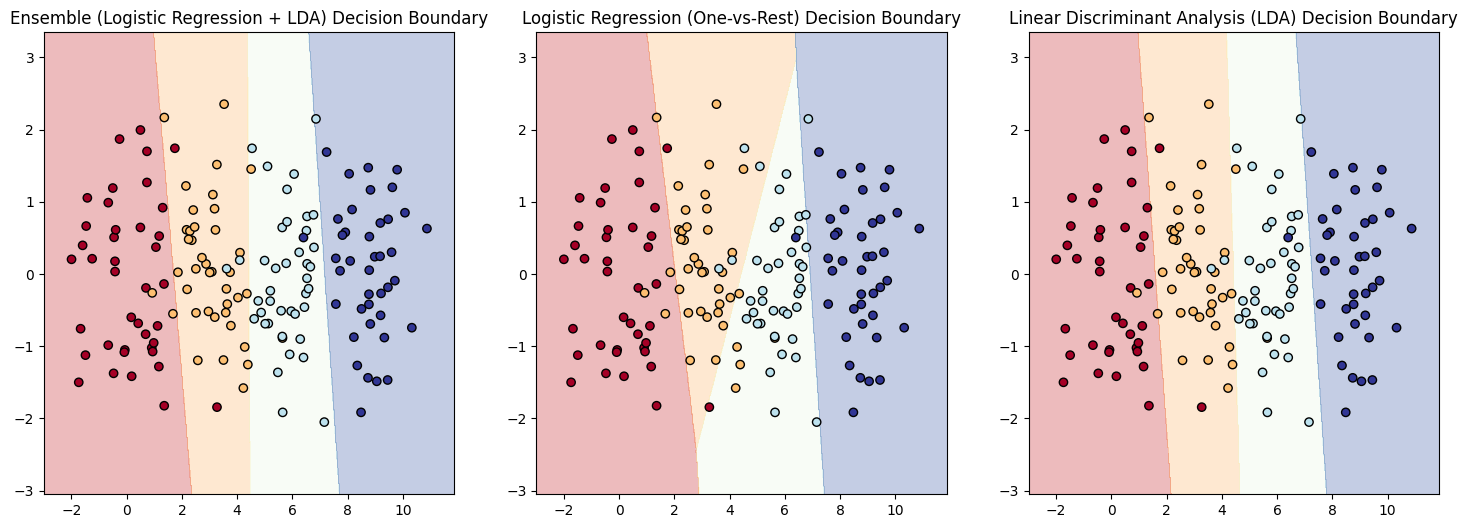

In [54]:
# Create a meshgrid to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the meshgrid
Z_lr = lr_model_4class.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

Z_lda = lda_model_4class.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda.reshape(xx.shape)

Z_ensemble = ensemble_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ensemble = Z_ensemble.reshape(xx.shape)

output_folder = r"E:\Machine Learning\Models\Logistic-Linear Driscrimination Analysis-Ensembling\output"

# Plotting the decision boundaries
plt.figure(figsize=(18, 6))

# Plot the Ensemble decision boundary
plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z_ensemble, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title("Ensemble (Logistic Regression + LDA) Decision Boundary")
plt.savefig(f"{output_folder}/Ensemble.jpg",format='jpg', dpi=300 ,bbox_inches='tight')

# Plot the Logistic Regression decision boundary
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z_lr, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title("Logistic Regression (One-vs-Rest) Decision Boundary")
plt.savefig(f"{output_folder}/Logistic Regression (One-vs-Rest) Decision Boundary.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
# Plot the LDA decision boundary
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z_lda, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title("Linear Discriminant Analysis (LDA) Decision Boundary")
plt.savefig(f"{output_folder}/Linear Discriminant Analysis (LDA) Decision Boundary.jpg",format='jpg', dpi=300 ,bbox_inches='tight')

plt.show()